Manuel Echave Mendez LU 1333/23

Agustin Ignacio Moguilevsky LU 951/23

Ian Pablo Marion LU 646/22

In [1]:
# Carga de paquetes necesarios para graficar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import geopandas as gpd
import seaborn as sns
import networkx as nx
import scipy
from scipy.linalg import eigh

In [2]:
import sys
sys.path.append('/content')
import funciones_TP1
import funciones_TP2
import importlib
importlib.reload(funciones_TP1)
importlib.reload(funciones_TP2)


<module 'funciones_TP2' from '/content/funciones_TP2.py'>

## Carga de datos de los museos

El listado de los museos, con el que se construye el [mapa](https://mapas.museosabiertos.org/museos/caba/), lo podemos encontrar [acá](https://github.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/blob/principal/data/export.geojson?short_path=bc357f3). También descargamos los barrios de CABA como complemento para los gráficos.

In [3]:
# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

## Visualización

In [4]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa),
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

## Construcción de la red en NetworkX (sólo para las visualizaciones)

In [5]:
def construye_adyacencia(D,m):
    # Función que construye la matriz de adyacencia del grafo de museos
    # D matriz de distancias, m cantidad de links por nodo
    # Retorna la matriz de adyacencia como un numpy.
    D = D.copy()
    l = [] # Lista para guardar las filas
    for fila in D: # recorriendo las filas, anexamos vectores lógicos
        l.append(fila<=fila[np.argsort(fila)[m]] ) # En realidad, elegimos todos los nodos que estén a una distancia menor o igual a la del m-esimo más cercano
    A = np.asarray(l).astype(int) # Convertimos a entero
    np.fill_diagonal(A,0) # Borramos diagonal para eliminar autolinks
    return(A)

m = 3 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

In [6]:
G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}

## **PRIMER PARTE**

## Punto 1:

Sabemos que:
$p=(1-α)Cp+\frac{\alpha}{N}1$

Podemos reorganizar esta ecuacion para agrupar los terminos con p:

$p-(1-α)Cp=\frac{\alpha}{N}1$

Sacamos $p$ como factor:

$(I-(1-α)C)p=\frac{\alpha}{N}1$

Por ultimo multiplicamos ambos lados por $\frac{N}{\alpha}$ (asumiendo α $\ne$ 0):

$\frac{N}{α}(I-(1-α)C)p=1$

Nos quedo lo que finalmente queriamos demostrar:

$Mp=1$

Porque $M=\frac{N}{α}(I-(1-α)C)$

## Punto 2:

En el punto 2 se nos pide dar la serie de condiciones para que la ecuación del punto anterior ($Mp = \mathbf{1}$) tenga una única solución.

Vemos que $p = M^{-1} \cdot \mathbf{1}$, por lo tanto $M$ debe ser no singular.

Esto es consistente matemáticamente ya que si $M$ es no singular, es un isomorfismo, lo que confirma que va a haber un único vector solución para cualquier sistema $Ax = b$, o en nuestro caso $Mp = \mathbf{1}$.

Para asegurar que la solución es única, no hay más restricciones que la mencionada.


**¿Se cumplen estas condiciones para la matriz $M$ tal como fue construida para los museos, cuando $0 < \alpha < 1$?**

Sabemos que $M = I - (1 - \alpha) C$, con $C$ estocástica. Eso quiere decir que $\|C\|_1 = 1$.

Si definimos $B = (1 - \alpha) C$, entonces:

$$
\|B\|_1 = (1 - \alpha)\|C\|_1 = 1 - \alpha
$$

Supongamos que $I - B$ es singular. Entonces existe un vector $x \neq 0$ tal que:

$$
(I - B)x = 0 \quad \Rightarrow \quad x = Bx
$$

Tomamos norma 1 de ambos lados:

$$
\|x\|_1 = \|Bx\|_1 \leq \|B\|_1 \cdot \|x\|_1 = (1 - \alpha) \cdot \|x\|_1
$$

Esto es un absurdo ya que implicaría que $\|x\|_1 \leq (1 - \alpha) \|x\|_1$ siendo $(1 - \alpha) < 1$.

Entonces, $I - B$ es no singular. Por lo tanto, M es inversible.


## Punto 3:

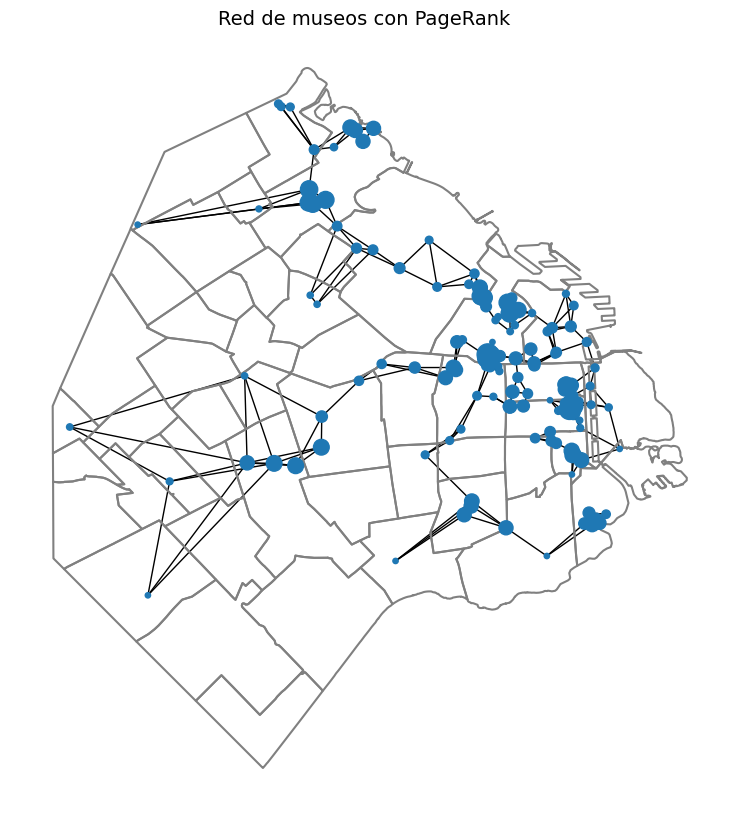

In [7]:
funciones_TP1.calcula_3a(D,G,museos,barrios)

Para $ m = 3 $ y $ \alpha = \frac{1}{5}$, observamos que los nodos con mayor tamaño representan museos más relevantes en la red según PageRank. Se destacan principalmente en zonas céntricas, lo que sugiere que están mejor conectados con el resto.


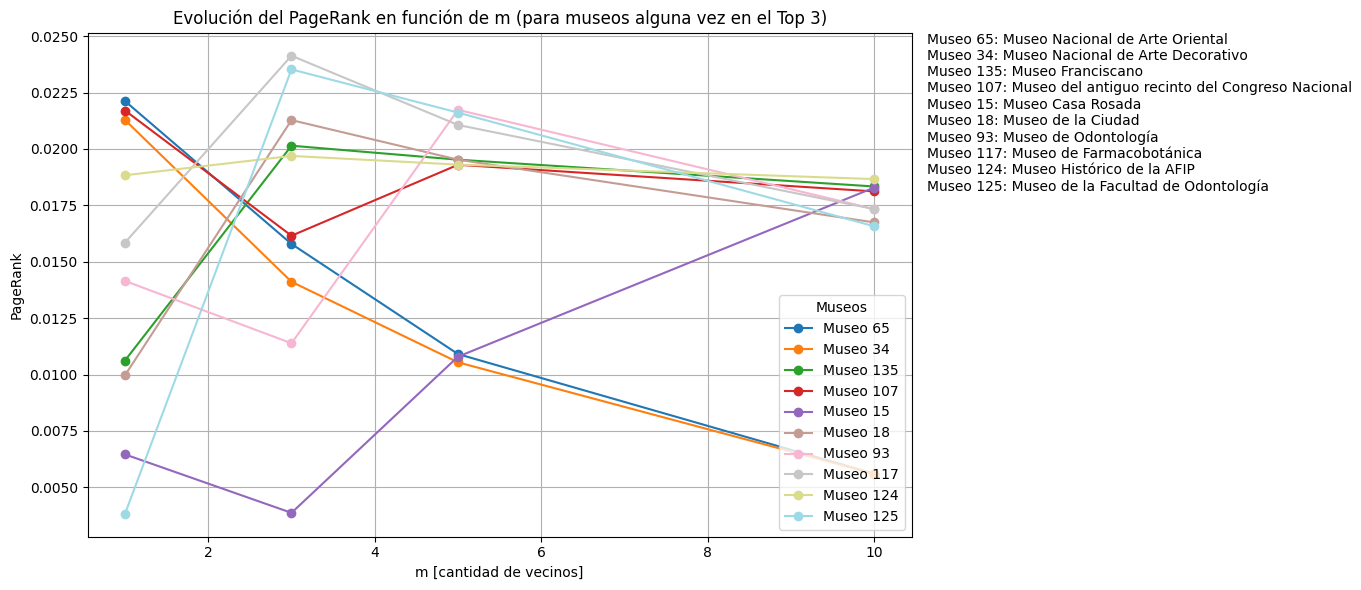

In [8]:
funciones_TP1.calcula_top3_m(D, museos)

El gráfico refleja cómo evoluciona el PageRank de los museos que alguna vez estuvieron en el top 3, en función de la cantidad de conexiones m. Algunos museos, como el Nacional de Arte Oriental, pierden protagonismo al aumentar m, mientras que otros, como el Museo del Congreso o el de la Ciudad, se fortalecen en redes más densas. Esto evidencia que la relevancia de cada museo depende fuertemente de la estructura general de la red.

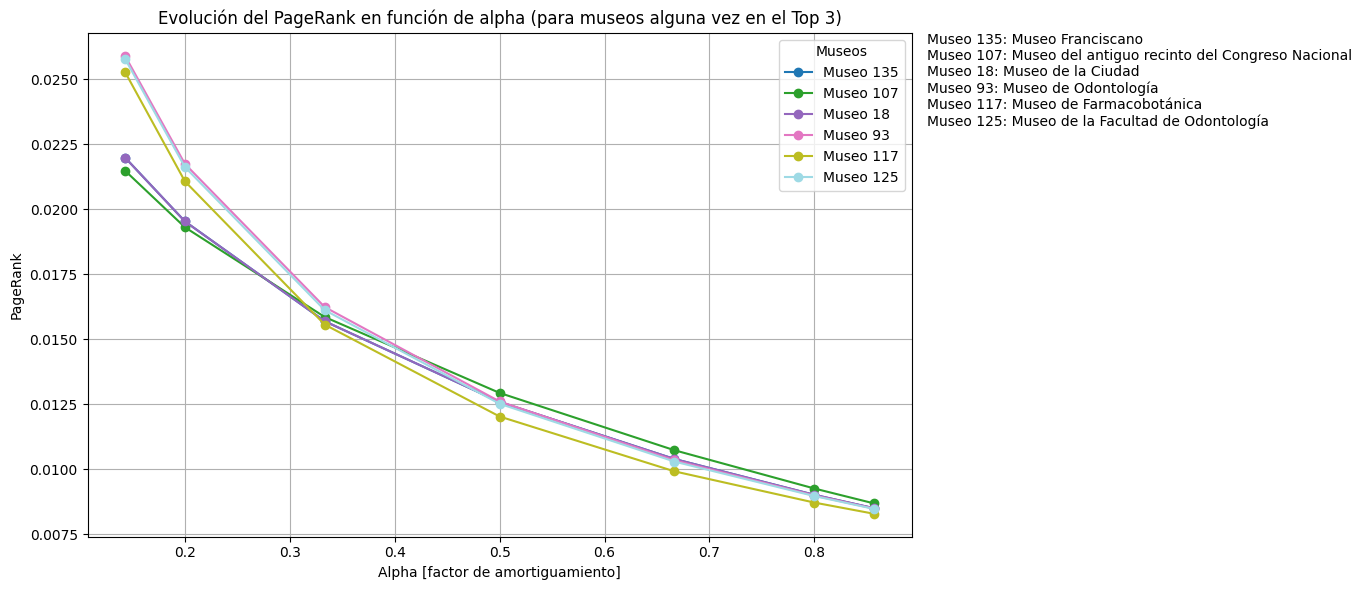

In [9]:
funciones_TP1.calcula_top3_alpha(D, museos)

Cuando el valor de α baja, los puntajes de PageRank de los museos más importantes se acercan y bajan juntos. Esto ocurre porque el algoritmo da más peso a saltos aleatorios y menos a la estructura de la red, por lo que la influencia se reparte de forma más pareja entre todos los museos.

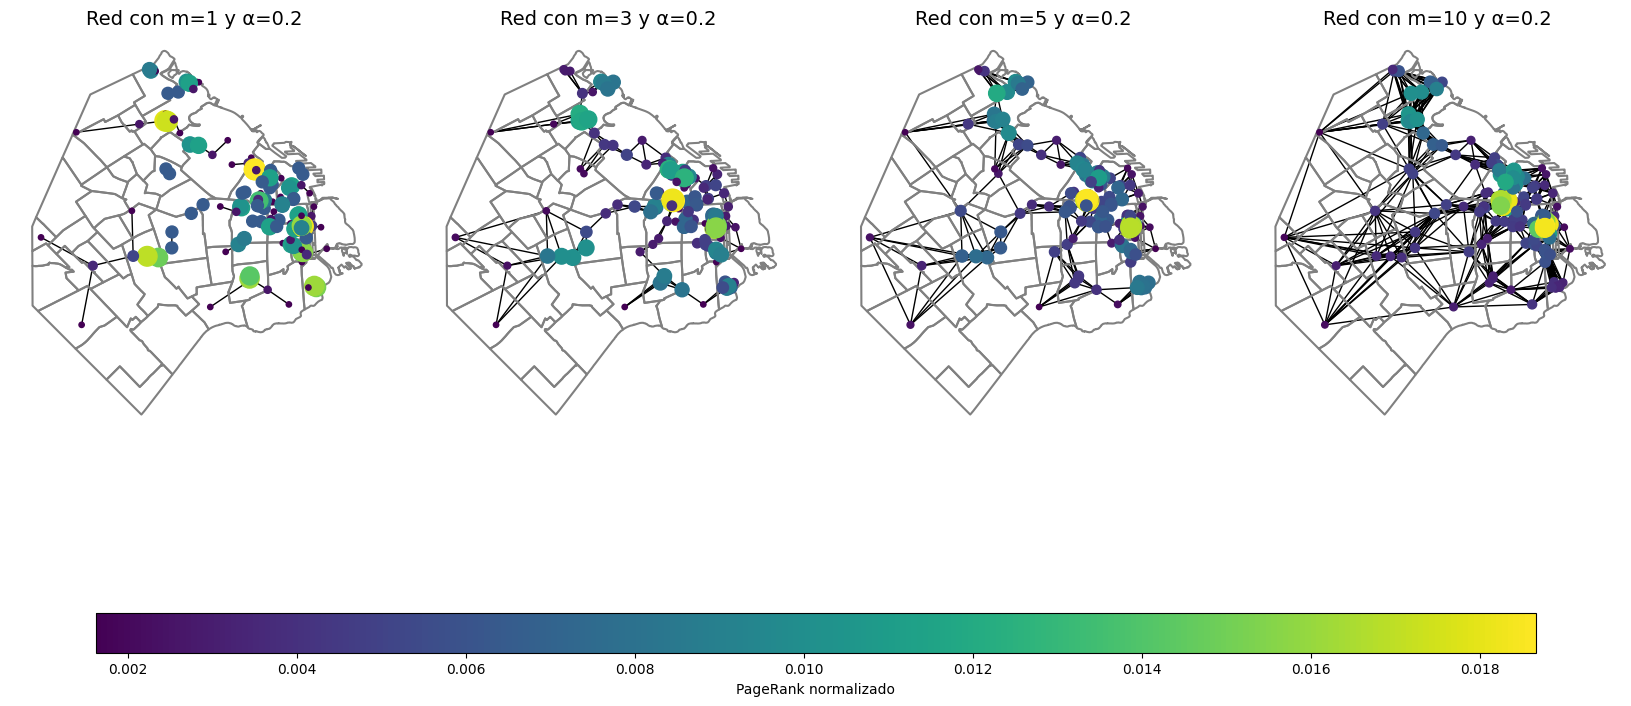

In [10]:
funciones_TP1.visualizar_red_m_variable(D,museos,barrios)

Al aumentar el número de vecinos considerados (m), cada museo pasa a tener más conexiones, lo que amplía la red y hace que los museos en zonas centrales como Recoleta y Palermo ganen mayor influencia. Esto se debe a que como estan en partes de la ciudad con alta densidad de museos, en las caminatas de visitantes cobran una relevancia particular. Así, al crecer m, se refuerza la idea de que estas áreas funcionan como nodos clave dentro de la ciudad. Por el contrario, la mayoría de los barrios (salvo algunos del norte) pierden relevancia. Museos que antes tenían un PageRank relativamente alto ven reducida su importancia, quedando con valores más bajos que en el subplot anterior.

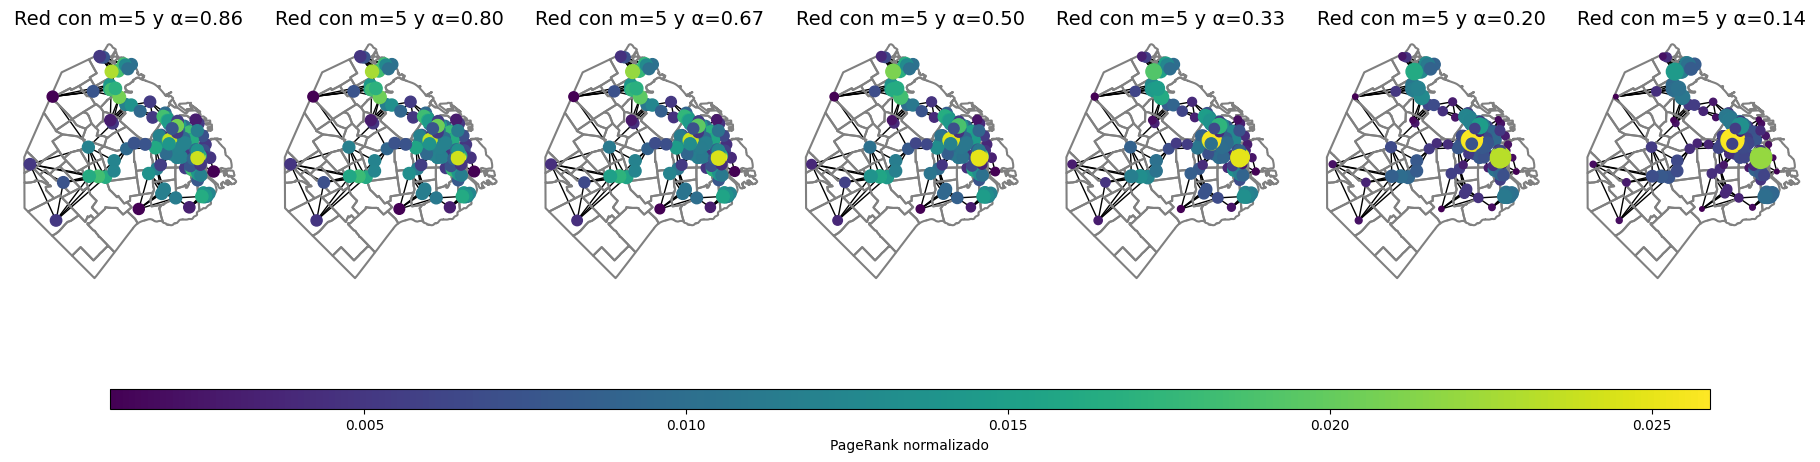

In [11]:
funciones_TP1.visualizar_red_alpha_variable(D,museos,barrios)

En los subplots se observa que, con valores altos de α, todos los museos tienen un PageRank considerable, lo que indica una distribución bastante pareja de la importancia. Esto se debe a que el algoritmo, al seguir poco la estructura de la red, tiende a repartir el peso entre todos los nodos. Sin embargo, a medida que α baja, el algoritmo empieza a privilegiar los caminos reales entre museos, y la importancia se concentra en zonas como Nuñez, Recoleta, Palermo y el Microcentro. Los museos de esas áreas, por estar más conectados, ganan protagonismo frente al resto.

###Conclusion general


En adicion a las subconclusiones a las que llegamos deteniendonos a ver los distintos ploteos que hicimos, creimos conveniente hacer un analisis con un caso especifico como representante de los fenomenos que estuvimos estudiando en esta parte del TP. Nos parecio interesante el comportamiento del museo de la casa rosada, ubicado al lado de la Plaza de Mayo (identificado en nuestros graficos como el museo "15" en violeta). El comportamiento de los museos en general, incluyendo este, cuando se deja el $m$ fijo y se juega con el $\alpha$ no varia mucho, mostrando una uniformidad del PageRank entre museos. Tiene sentido ya que deja de ser relevante que tan bien ubicado esta el museo, o que tantos otros museos tiene cerca, porque si el $\alpha$ es alto, los visitantes tendrian altas chances de "aburrirse" y comenzar su recorrido desde otro museo que puede o no tener relacion con el que estaban. Se podria decir que al aumentar el $\alpha$ la relevancia de la ubicacion geografica y la conveniencia de cercania con otros museos sigue estando pero es mucho menor, se reduce considerablemente. Nos parece mucho mas interesante que sucede cuando le damos un lugar de mayor relevancia a la cantidad de "vecinos" ($m$) que el museo tiene. Con el museo de la casa rosada sucede algo bastante particular, con el $\alpha$ fijo, y el $m$ pequeño, el museo tiene un relevancia verdaderamente pequeña, esto se debe a que en las inmediaciones directas (ubicacion exacta) realmente no tiene muchos establecimientos similares. Pero lo revelador se encuentra en ver su evolucion del PageRank con $m$ cada vez mas grande, el museo de la casa rosada cobra una relevancia enorme, ya que empezamos a ver la zona en general como factor de relevancia del museo y no la ubicacion exacta unicamente. La zona del museo, si se la ve un poco ampliada, esta plagada de museos (potenciales vecinos para el de la casa rosada), como el museo de la arca, el BAM, la manzana de las luces o el museo del cabildo. Al ver el comportamiento especifico de este museo podemos notar entonces que es lo que destilamos al bajar el m (relevancia en contexto geografico acotadado) y al subir el m (que tan interconectado esta el museo, que tan buena ubicacion tiene).

## Punto 4:

Partimos de las siguientes hipótesis:

- Cada persona realiza $r$ visitas antes de abandonar la red.
- $\mathbf{v}$ es el vector que indica cuántas personas entraron inicialmente a cada museo.
- $\mathbf{w}$ es el vector que indica cuántas visitas totales recibió cada museo.
- $C$ es la matriz de transición de la red.


\
$C^k \mathbf{v}$ es el vector de distribución de visitas después de $k$ pasos, si las personas comenzaron en los museos según la distribución $\mathbf{v}$. Entonces:

$$
C^0 \mathbf{v} = \mathbf{v} \quad \text{(visitas iniciales)}
$$

$$
C^1 \mathbf{v} \quad \text{(visitas luego de un paso)}
$$

$$
\vdots
$$

$$
C^{r-1} \mathbf{v} \quad \text{(visitas luego de $r-1$ pasos)}
$$

La suma total de los terminos la representamos como:

$$
\sum_{k=0}^{r-1} C^k \mathbf{v}
$$

Esto da el total de visitas a cada museo, considerando que cada persona hace $r$ visitas. Es decir:

$$
\sum_{k=0}^{r-1} C^k \mathbf{v} = \mathbf{w}
$$
Por lo tanto:
$$
\mathbf{w} = \sum_{k=0}^{r-1} C^k \mathbf{v}
$$

$$
\Rightarrow \mathbf{w} = \left( \sum_{k=0}^{r-1} C^k \right) \mathbf{v} \quad
$$

$$
\Rightarrow \mathbf{w} = B \mathbf{v}, \quad \text{con} \quad B := \sum_{k=0}^{r-1} C^k
$$

$$
\Rightarrow \mathbf{v} = B^{-1} \mathbf{w} \quad \text{(siempre que $B$ sea invertible)}
$$

$$
\boxed{\mathbf{v} = \left( \sum_{k=0}^{r-1} C^k \right)^{-1} \mathbf{w}}
$$


## Punto 5:

In [12]:
r = 3
v, B = funciones_TP1.calcula_v(D,r)
visitas = funciones_TP1.calcula_norma_1(v)
print(visitas)

136605.0


In [13]:
# Para corroborar que el output dado tiene sentido
w = funciones_TP1.obtener_w()
w_sombrerito = B @ v
error = funciones_TP1.calcula_norma_1(w - w_sombrerito)  # Error absoluto
print("||w||_1 =",funciones_TP1.calcula_norma_1(w))
print("||w - Bv||_1 =", error)

||w||_1 = 409815.0
||w - Bv||_1 = 5.502442945726216e-11


## Análisis del resultado obtenido

Dado el valor de $r = 3$, resolvimos el sistema utilizando la función `calcula_v(D, r)`, la cual devuelve el vector $v$ y la matriz $B$ tal que:

$$
w = Bv \quad \Rightarrow \quad v = B^{-1}w
$$

Luego, calculamos el número total de visitas como la norma $1$ del vector $v$:

$$
\|v\|_1 = 136605.0
$$

Para verificar que el resultado tenga sentido, obtuvimos el vector $w$ utilizando la función `obtener_w()`, y calculamos el error absoluto entre el vector original y el reconstruido mediante $Bv$:

$$
\|w - Bv\|_1 = 5.502442945726216~e^{-11}
$$

Este valor es extremadamente pequeño, lo cual indica que la solución obtenida es numéricamente muy precisa.

También calculamos la norma $1$ del vector $w$:

$$
\|w\|_1 = 409815.0
$$

Este valor tiene sentido, ya que cada persona realizó exactamente $r = 3$ visitas. Por lo tanto, estimamos la cantidad de personas como:

$$
\frac{\|w\|_1}{r} = \frac{409815}{3} \approx 136605
$$
En resumen, el resultado es consistente con lo esperado y el error es despreciable.


## Punto 6:

Para obtener el numero de condicion de $B$, necesitamos calcular la norma 1 de B y la norma 1 de $B^{-1}$:


In [14]:
# Calculamos la norma 1 de B
B_norma_1 = funciones_TP1.calcula_norma_1(B)

print("||B||_1 =", B_norma_1)

# Calculamos B_inv

B_inv = funciones_TP1.inversaLU(B)

# Calculamos la norma 1 de B_inv

B_inv_norma_1 = funciones_TP1.calcula_norma_1(B_inv)

print("||B_inv||_1 =", B_inv_norma_1)

cond_1_B = B_norma_1 * B_inv_norma_1
print("cond_1(B) =", cond_1_B)

||B||_1 = 3.000000000000003
||B_inv||_1 = 1.6839237255550006
cond_1(B) = 5.051771176665007


## Análisis de la estabilidad del sistema y su número de condición

Se modela el número de visitas a los museos como $w = Bv$, donde:

- $w$ es el total de visitas recibidas por cada museo,
- $v$ es el número de visitantes únicos (las “primeras visitas”),
- y $B$ es una matriz que modela cuántas veces repite la visita un visitante en promedio.

Nuestro objetivo es estimar $v$ a partir de $w$, es decir, debemos resolver:

$$
v = B^{-1} w
$$

Calculamos el número de condición de $B$ en la norma 1:

$$
\|B\|_1 =3.000000000000003, \quad \|B^{-1}\|_1 = 1.6839237255550006
$$

Por lo tanto,

$$
\text{cond}_1(B) = \|B\|_1 \cdot \|B^{-1}\|_1 \approx 5.051771176665007
$$

Este valor nos indica que $B$ **no está mal condicionada**. De hecho, un número de condición cercano a 10 sugiere que el sistema es razonablemente estable frente a errores en los datos.



Ahora bien, se nos pide acotar el **error relativo en $v$**, dado un error relativo del 5% en $w$, es decir:

$$
\frac{\|w - \hat{w}\|_1}{\|w\|_1} = 0.05
$$

Aplicamos la desigualdad que relaciona los errores relativos:

$$
\frac{\|v - \hat{v}\|_1}{\|v\|_1} \leq \text{cond}_1(B) \cdot \frac{\|w - \hat{w}\|_1}{\|w\|_1}
$$

Reemplazando:

$$
\frac{\|v - \hat{v}\|_1}{\|v\|_1} \leq 5.051771176665007 \cdot 0.05 = 0.2526
$$

Esto quiere decir que **un error del 5% en los datos de entrada podría generar un error de hasta el 25.26% en el resultado**. Si bien no es una catástrofe, nos muestra que **el sistema amplifica el error de entrada**, aunque no de manera exagerada.


Este análisis nos permite afirmar que:

- El sistema **no es extremadamente sensible** a los errores,
- Pero aún así, **los errores pueden amplificarse**, por lo que es importante trabajar con datos lo más precisos posible.



## SEGUNDA PARTE

# **Punto 1**

### a) Autovectores y autovalores de \(L\) y \(R\)

Queremos demostrar que el vector de unos $\mathbf{1} = (1, 1, \dots, 1)^T$ es autovector de las matrices $L$ (matriz Laplaciana) y $R$ (matriz de modularidad), hallar sus autovalores correspondientes e interpretar qué agrupación representa.


#### Matriz Laplaciana

La matriz Laplaciana se define como:

$$
L = K - A
$$

donde $A \in \mathbb{R}^{n \times n}$es la matriz de adyacencia del grafo (simétrica), y $K$ es la matriz diagonal de grados, tal que:

$$
K_{ii} = k_i = \sum_{j=1}^n A_{ij}
$$

Evaluamos ahora la acción de $L$ sobre el vector de unos $\mathbf{1}$:

$$
L\mathbf{1} = (K - A)\mathbf{1} = K\mathbf{1} - A\mathbf{1}
$$

Dado que $A\mathbf{1}$ da como resultado el vector de grados $\mathbf{k}$, y que $ K\mathbf{1} $ también es $ \mathbf{k} $ (porque $ K $ es una matriz diagonal con los grados en la diagonal), se sigue que:

$$
L\mathbf{1} = \mathbf{k} - \mathbf{k} = \mathbf{0}
$$

Por lo tanto:

$$
L\mathbf{1} = 0 \cdot \mathbf{1}
$$

**Conclusión:** El vector $\mathbf{1}$  es autovector de $L$ con autovalor igual a 0.

**Interpretación:** Esta solución representa la agrupación trivial en la que todos los nodos pertenecen a un mismo grupo, ya que no hay cambio de signo que permita particionar la red.


#### Matriz de modularidad

La matriz de modularidad se define como:

$$
R = A - P
$$

donde $P$ es la matriz de conexiones esperadas bajo el modelo de configuración, con entradas:

$$
P_{ij} = \frac{k_i k_j}{2E}
$$

Aquí $E$ es el número total de enlaces de la red (escalar), y $k_{i}$ es el grado del nodo $ i $.

Queremos evaluar $R\mathbf{1}$:

$$
R\mathbf{1} = A\mathbf{1} - P\mathbf{1}
$$

Sabemos que $A\mathbf{1} = \mathbf{k}$. Evaluamos $P\mathbf{1}$:

$$
(P\mathbf{1})_i = \sum_{j=1}^n \frac{k_i k_j}{2E} = \frac{k_i}{2E} \sum_{j=1}^n k_j = \frac{k_i}{2E} \cdot 2E = k_i
$$

Entonces $P\mathbf{1} = \mathbf{k}$, y por lo tanto:

$$
R\mathbf{1} = \mathbf{k} - \mathbf{k} = \mathbf{0}
$$

Por lo tanto:

$$
R\mathbf{1} = 0 \cdot \mathbf{1}
$$

**Conclusión:** El vector $\mathbf{1}$ también es autovector de $ R $ con autovalor igual a 0.

**Interpretación:** Como en el caso de $L$, esta configuración representa la agrupación trivial en la cual todos los nodos forman una sola comunidad.


#### Conclusión final

Tanto la matriz Laplaciana $L$ como la matriz de modularidad $R$ tienen al vector de unos $\mathbf{1}$ como autovector asociado al autovalor 0. Este vector representa la configuración en la cual todos los nodos de la red están en la misma comunidad.

Sin embargo, esta agrupación es poco informativa. Por eso, en los métodos espectrales se buscan otras direcciones:

- En el caso de $L$, se utiliza el segundo autovalor más chico para encontrar una partición con corte mínimo.
- En el caso de $R$, se maximiza la modularidad buscando el autovalor más grande.

Ambos enfoques permiten detectar divisiones más útiles y con sentido estructural dentro de la red, que es por lo que estamos viendo como nos son utiles para analisis de este tipo.

### b) Ortogonalidad de autovectores asociados a autovalores distintos

Queremos demostrar que si una matriz simétrica $M$ (por ejemplo, $L$ o $R$) tiene dos autovectores $\mathbf{v}_1$ y $\mathbf{v}_2$, asociados a autovalores distintos $\lambda_1 \ne \lambda_2$, entonces se cumple:

$$
\mathbf{v}_1^T \mathbf{v}_2 = 0
$$

Es decir, los autovectores asociados a autovalores distintos de una matriz simétrica son ortogonales.


#### Demostración

Supongamos que:

$$
M \mathbf{v}_1 = \lambda_1 \mathbf{v}_1 \quad \text{y} \quad M \mathbf{v}_2 = \lambda_2 \mathbf{v}_2
$$

Tomamos el producto escalar de $\mathbf{v}_1^T$ por ambos lados de la ecuación $M\mathbf{v}_2 = \lambda_2 \mathbf{v}_2$:

$$
\mathbf{v}_1^T M \mathbf{v}_2 = \lambda_2 \mathbf{v}_1^T \mathbf{v}_2 \tag{1}
$$

Por otro lado, como $M$ es simétrica ($M^T = M$), también podemos escribir:

$$
\mathbf{v}_1^T M \mathbf{v}_2 = (M \mathbf{v}_1)^T \mathbf{v}_2 = (\lambda_1 \mathbf{v}_1)^T \mathbf{v}_2 = \lambda_1 \mathbf{v}_1^T \mathbf{v}_2 \tag{2}
$$

Comparando (1) y (2):

$$
\lambda_1 \mathbf{v}_1^T \mathbf{v}_2 = \lambda_2 \mathbf{v}_1^T \mathbf{v}_2
$$

Restando ambos lados:

$$
(\lambda_1 - \lambda_2) \mathbf{v}_1^T \mathbf{v}_2 = 0
$$

Como por hipótesis $\lambda_1 \ne \lambda_2$, osea que $(\lambda_1 - \lambda_2)$ es no nulo, se concluye que:

$$
\mathbf{v}_1^T \mathbf{v}_2 = 0
$$


#### Conclusión

Los autovectores $\mathbf{v}_1$ y $\mathbf{v}_2$ asociados a autovalores distintos de una matriz simétrica son ortogonales. Este resultado aplica tanto a la matriz Laplaciana $L$ como a la matriz de modularidad $R$, ya que ambas son simétricas por construcción.

Esta propiedad es esencial para los métodos espectrales (como los dos que estamos explorando en esta parte dos del TP), ya que garantiza la existencia de una base ortonormal de autovectores que puede utilizarse para descomponer la estructura de la red.


### Punto 1c — Suma nula de autovector no trivial

Queremos demostrar que si $\mathbf{v}$ es un autovector asociado a un autovalor $\lambda \ne 0$ de una matriz simétrica $M$ (donde $M$ puede ser $L$ o $R$), entonces se cumple:

$$
\sum_i v_i = 0
$$

Es decir, la suma de las componentes del autovector es cero.


#### Estrategia:

Sabiendo que $M$ es una matriz simetrica sumado a la conclusion a la que llegamos en el punto $1 b)$, que los autovectores asociados a autovalores distintos no nulos son ortogonales, vemos que:


Si $\mathbf{v}$ es un autovector con $\lambda \ne 0$, entonces, por la **ortogonalidad entre autovectores distintos**, se cumple:

$$
\mathbf{v}^T \mathbf{1} = 0
$$

Pero esto no es más que la suma de las componentes de $\mathbf{v}$:

$$
\mathbf{v}^T \mathbf{1} = \sum_i v_i = 0
$$


#### Conclusión

Todo autovector de $L$ o $R$ asociado a un autovalor distinto de cero tiene suma nula. Esto es consecuencia directa de la ortogonalidad con el autovector $\mathbf{1}$ (que está asociado al autovalor 0), gracias a la simetría de la matriz.


## **Punto 2**

### a) Shifting de autovalores

Queremos demostrar que para una matriz $M \in \mathbb{R}^{n \times n}$ diagonalizable con autovalores $\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_n$ y autovectores asociados $\mathbf{v}_i$, se cumple:

1. Los autovalores de $M + \mu I$ son $\gamma_i = \lambda_i + \mu$ con los mismos autovectores $\mathbf{v}_i$
2. Si $\mu + \lambda_i \neq 0$ $\forall i$, entonces $M + \mu I$ es inversible

#### Demostración

**Parte 1:**  
Por definición de autovalor:
$$
M\mathbf{v}_i = \lambda_i\mathbf{v}_i
$$

Al aplicar el "shifting":
$$
(M + \mu I)\mathbf{v}_i = M\mathbf{v}_i + \mu I\mathbf{v}_i = \lambda_i\mathbf{v}_i + \mu\mathbf{v}_i = (\lambda_i + \mu)\mathbf{v}_i
$$

Por lo tanto, $\mathbf{v}_i$ sigue siendo autovector pero con autovalor desplazado $\gamma_i = \lambda_i + \mu$.

**Parte 2:**  
Una matriz es inversible si y solo si todos sus autovalores son no nulos. Como los nuevos autovalores son $\gamma_i = \lambda_i + \mu$, la condición $\mu + \lambda_i \neq 0$ garantiza $\gamma_i \neq 0$ para todo $i$.

#### Conclusión

El "shifting" $\mu I$ preserva los autovectores pero desplaza los autovalores. Este resultado:
- Es análogo a lo visto en el Punto 1a con el autovector $\mathbf{1}$
- Será fundamental para el método de la potencia inversa (Punto 2b)
- Explica por qué podemos "mover" el espectro de $L$ o $R$ manteniendo su estructura de autovectores

**Observación:** Para $L$ y $R$ (matrices simétricas como en 1b), esta propiedad mantiene la ortogonalidad de los autovectores.

### Punto 2b — Método de la potencia inversa

Queremos demostrar que para el Laplaciano $L$ y $\mu > 0$:

1. $L + \mu I$ es inversible
2. El método de la potencia aplicado a $(L + \mu I)^{-1}$ converge al autovector de autovalor más pequeño
3. Identificar el autovector y autovalor cuando es único

#### Demostración

**Parte 1 (Invertibilidad):**  
Por el Punto 2a sabemos que los autovalores de $L + \mu I$ son $\gamma_i = \lambda_i + \mu$, donde $\lambda_i$ son los autovalores de $L$.

Como $L$ es semidefinida positiva (visto en la introducción del TP), $\lambda_i \geq 0$. Con $\mu > 0$:
$$
\gamma_i = \lambda_i + \mu \geq \mu > 0 \quad \forall i
$$
Por tanto, $L + \mu I$ es inversible (todos sus autovalores son positivos).

**Parte 2 (Convergencia del método):**  
El método de la potencia aplicado a $B = (L + \mu I)^{-1}$ converge a una combinacion lineal de los vectores del autoespacio asociado.

Por propiedades de inversas:
$$
B\mathbf{v}_i = \frac{1}{\lambda_i + \mu}\mathbf{v}_i
$$

El autovalor dominante de $B$ corresponde al menor $\gamma_i = \lambda_i + \mu$ (es decir, al $\lambda_i$ más pequeño de $L$).

**Parte 3 (Caso de multiplicidad 1):**

Cuando $\lambda_{\text{mín}}$ tiene multiplicidad algebraica 1:
- **Autovector**: El único $\mathbf{v}_{\text{mín}}$ (salvo multiplicación por escalar) que cumple $L\mathbf{v}_{\text{mín}} = \lambda_{\text{mín}}\mathbf{v}_{\text{mín}}$
- **Autovalor de $(L + \mu I)^{-1}$**: Exactamente $\frac{1}{\lambda_{\text{mín}} + \mu}$

#### Conclusión

1. **Invertibilidad garantizada** por $\mu > 0$ y la positividad de $L$ (relacionado con el Punto 2a)
2. **Convergencia al autovector principal**: La iteración potencia inversa encuentra "la dirección de mínima energía".
3. **Caso no trivial**: Cuando $L$ tiene autovalor 0 único (como en grafos conexos), el método converge a $\mathbf{1}$ (visto en Punto 1a), con tasa $\frac{1}{\mu}$.

#### Cita y comentario sobre caso no trivial

En $Spectral~Graph~Theory~(1997)$ de $Fan~R.~K.~Chung$ se muestra el resultado de la afirmacion sobre el autovalor 0 unico, que viene de que el número de autovalores cero del Laplaciano de un grafo corresponde al número de componentes conexas. Por lo tanto, un grafo conexo tiene un único autovalor 0, asociado al vector constante.


Estas 3 conclusiones justifican el algoritmo para encontrar particiones mediante el segundo autovalor del Laplaciano, de lo que en partes siguientes del TP se habla (punto 3, inciso b, parte 4)

### c) Deflación de Hotelling

Queremos demostrar que para una matriz simétrica $M$ con autovector $\mathbf{v}_1$ (asociado a $\lambda_1$), la matriz deflacionada:

$$
\widetilde{M} = M - \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^T}{\mathbf{v}_1^T \mathbf{v}_1}
$$

conserva los mismos autovectores que $M$, pero reemplaza $\lambda_1$ por 0.

#### Demostración

**Paso 1: Acción sobre $\mathbf{v}_1$**  
Multiplicamos $\widetilde{M}$ por el autovector principal:
$$
\widetilde{M}\mathbf{v}_1 = M\mathbf{v}_1 - \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^T \mathbf{v}_1}{\mathbf{v}_1^T \mathbf{v}_1} = \lambda_1 \mathbf{v}_1 - \lambda_1 \mathbf{v}_1 = 0
$$
Por tanto, $\mathbf{v}_1$ sigue siendo autovector pero ahora con autovalor 0.

**Paso 2: Acción sobre otros autovectores**  
Para cualquier autovector $\mathbf{v}_i$ ($i \neq 1$) ortogonal a $\mathbf{v}_1$ (por simetría de $M$):
$$
\widetilde{M}\mathbf{v}_i = M\mathbf{v}_i - \lambda_1 \frac{\mathbf{v}_1 \mathbf{v}_1^T \mathbf{v}_i}{\mathbf{v}_1^T \mathbf{v}_1} = \lambda_i \mathbf{v}_i - 0 = \lambda_i \mathbf{v}_i
$$
La ortogonalidad $\mathbf{v}_1^T \mathbf{v}_i = 0$ cancela el segundo término.

#### Conclusión

**Transformación espectral**:  
   - Todos los autovalores de $M$ se preservan excepto $\lambda_1$, que se anula.
   - La base de autovectores permanece inalterada.

# **Punto 3**

a)


In [15]:
# Matriz A de ejemplo
A_ejemplo = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])
s = np.array([1, 1, 1, 1, -1, -1, -1, -1])

In [16]:
# Calculamos las matrices L y R
L = funciones_TP2.calcula_L(A_ejemplo)
R = funciones_TP2.calcula_R(A_ejemplo)

# Calculamos el corte mínimo Λ y la modularidad Q usando el vector s
lambda_val = funciones_TP2.calcula_lambda(L, s)
Q_val = funciones_TP2.calcula_Q(R, s)

print(f"Valor del corte mínimo (Λ): {lambda_val:.4f}")
print(f"Valor de la modularidad (Q): {Q_val:.4f}")


Valor del corte mínimo (Λ): 2.0000
Valor de la modularidad (Q): 20.0000


b)

In [17]:
# Obtenemos el autovector asociado al segundo autovalor más chico de L
v_L, autoval_L, _ = funciones_TP2.metpotI2(L, 0.1)

# Obtenemos el autovector asociado al mayor autovalor de R
v_R, autoval_R, _ = funciones_TP2.metpot1(R)

# Construimos los vectores s a partir del signo
s_L = np.sign(v_L)
s_R = np.sign(v_R)

# Comparamos y mostramos resultados
print("Vector s obtenido a partir de L:", s_L)
print("Coincide con esperado:", np.array_equal(s_L, s) or np.array_equal(s_L, -s))

print("\nVector s obtenido a partir de R:", s_R)
print("Coincide con esperado:", np.array_equal(s_R, s) or np.array_equal(s_R, -s))

print(f"\nSegundo autovalor más chico de L: {autoval_L:.4f}")
print(f"Mayor autovalor de R: {autoval_R:.4f}")
print("Autovec asociado:", v_R)

Vector s obtenido a partir de L: [-1. -1. -1. -1.  1.  1.  1.  1.]
Coincide con esperado: True

Vector s obtenido a partir de R: [ 1.  1.  1.  1. -1. -1. -1. -1.]
Coincide con esperado: True

Segundo autovalor más chico de L: 0.7639
Mayor autovalor de R: 2.5616
Autovec asociado: [ 0.3941027   0.3941027   0.30766368  0.30774858 -0.30774858 -0.30766368
 -0.3941027  -0.3941027 ]


c)


In [18]:
# -- LAPACIANO (niveles=2 ⇒ 4 grupos) --
print("Variación de particiones con Laplaciano (niveles=2):")
for seed in range(4):
    grupos_lap = funciones_TP2.laplaciano_iterativo(A_ejemplo, niveles=2, seed=seed)
    print(f"Seed {seed}: {grupos_lap}")

# -- MODULARIDAD --
print("\nVariación de particiones con Modularidad:")
for seed in range(4):
    grupos_mod = funciones_TP2.modularidad_iterativo(A=A_ejemplo, seed=seed)
    print(f"Seed {seed}: {grupos_mod}")


Variación de particiones con Laplaciano (niveles=2):
Seed 0: [[5], [4, 6, 7], [1], [0, 2, 3]]
Seed 1: [[0, 1], [2, 3], [4, 5], [6, 7]]
Seed 2: [[4, 6, 7], [5], [0, 2, 3], [1]]
Seed 3: [[0, 1], [2, 3], [4, 5], [6, 7]]

Variación de particiones con Modularidad:
Seed 0: [[4, 5, 6, 7], [0, 1, 2, 3]]
Seed 1: [[0, 1, 2, 3], [4, 5, 6, 7]]
Seed 2: [[4, 5, 6, 7], [0, 1, 2, 3]]
Seed 3: [[0, 1, 2, 3], [4, 5, 6, 7]]


Al aplicar el método del Laplaciano con diferentes seeds, notamos que los grupos que se generan varían en cada ejecución. Esto se debe a que el método de la potencia, que usamos para obtener el autovector de la partición, puede converger a distintos vectores si el autovalor al que corresponde tiene multiplicidad mayor a uno. En otras palabras, el resultado depende de cómo se inicializa el algoritmo.
Por el contrario, el método de modularidad muestra una estabilidad mucho mayor: las particiones obtenidas se repiten en todas las ejecuciones. Aunque el orden de los grupos puede cambiar, el esquema de partición es siempre el mismo. Esto sugiere que el autovalor dominante en la matriz de modularidad tiene multiplicidad 1, lo que garantiza una convergencia más consistente y, por lo tanto, un resultado más estable.

In [19]:
# Verificamos si la matriz de modularidad tiene un autovalor dominante con multiplicidad mayor a 1
R = funciones_TP2.calcula_R(A_ejemplo)
autovalores_R = np.linalg.eigh(R)[0]
autovalores_R_redondeados = np.round(autovalores_R, 3)

mayor_autoval = autovalores_R_redondeados[-1]
multiplicidad_mayor = np.sum(autovalores_R_redondeados == mayor_autoval)

print("\nAutovalores de la matriz de modularidad (redondeados):")
print(autovalores_R_redondeados)
print(f"Multiplicidad del autovalor dominante ({mayor_autoval}): {multiplicidad_mayor}")



Autovalores de la matriz de modularidad (redondeados):
[-2.    -1.562 -1.    -1.    -0.571 -0.     0.     2.562]
Multiplicidad del autovalor dominante (2.562): 1


# **Punto 4**

Obs: Para determinar el valor de los niveles del laplaciano se busco un valor que genere a lo sumo +-2 grupos que modularidad.

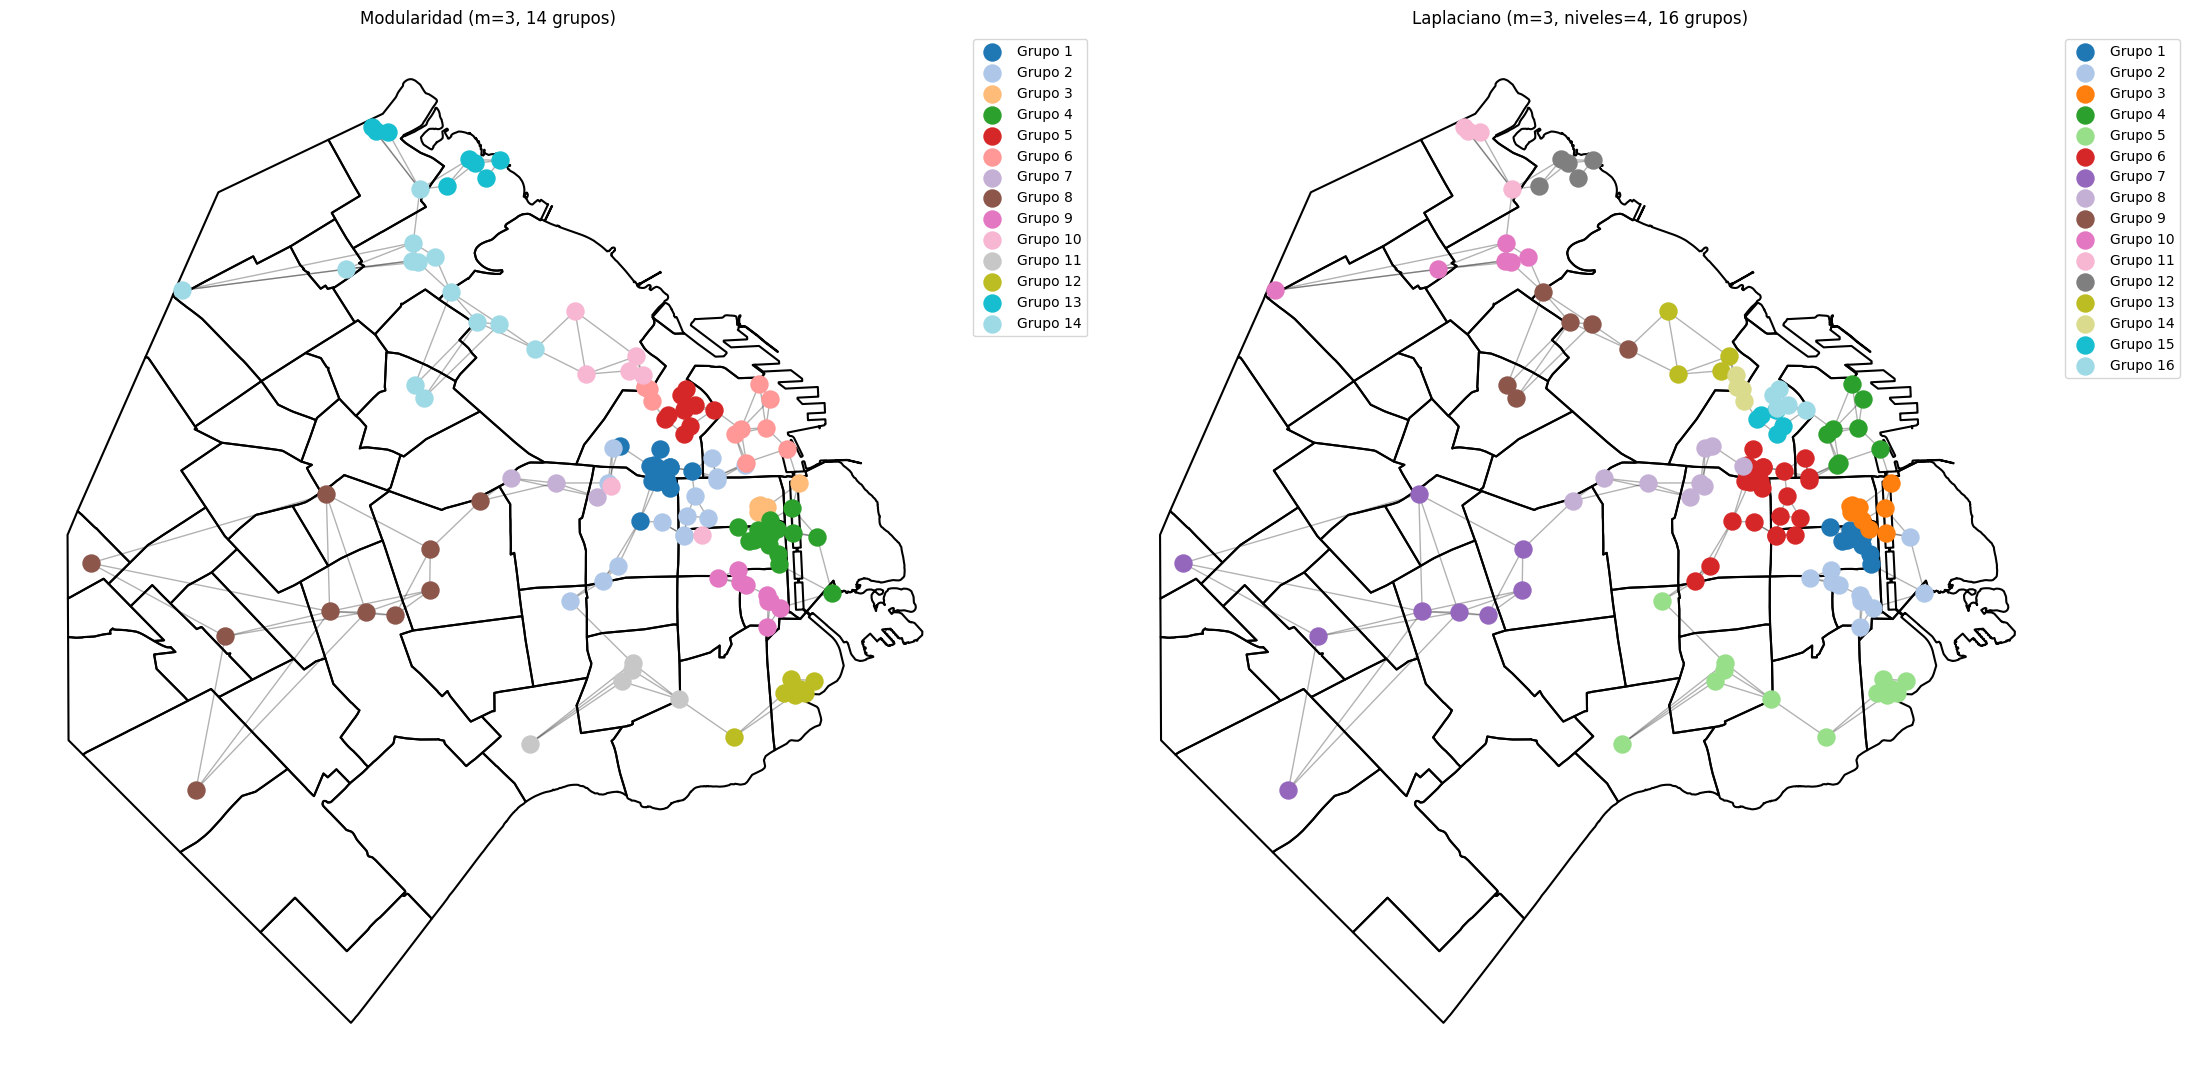

In [20]:
funciones_TP2.correr_metodos(D, 3, G_layout,barrios)


En la zona sur de la ciudad notamos que el método del laplaciano tiende a agrupar una mayor cantidad de museos dentro de una única comunidad, mientras que la modularidad los distribuye en más grupos pequeños. Sin embargo, este comportamiento cambia cuando nos movemos hacia el centro o norte de la ciudad, donde la densidad de museos es mayor. Ahi el laplaciano comienza a segmentar más el territorio, generando varias comunidades pequeñas en una misma zona. La modularidad, en cambio, agrupa esa área central en menos comunidades, pero parece no respetar tanto un criterio espacial, hay museos que pertenecen a una comunidad que terminan rodeados por otra, algo que no ocurre con el laplaciano, que particiona siguiendo una lógica más coherente en términos de cercanía geográfica.
Por otro lado, en la zona oeste de la ciudad ambos métodos coinciden bastante, generando una partición prácticamente idéntica.

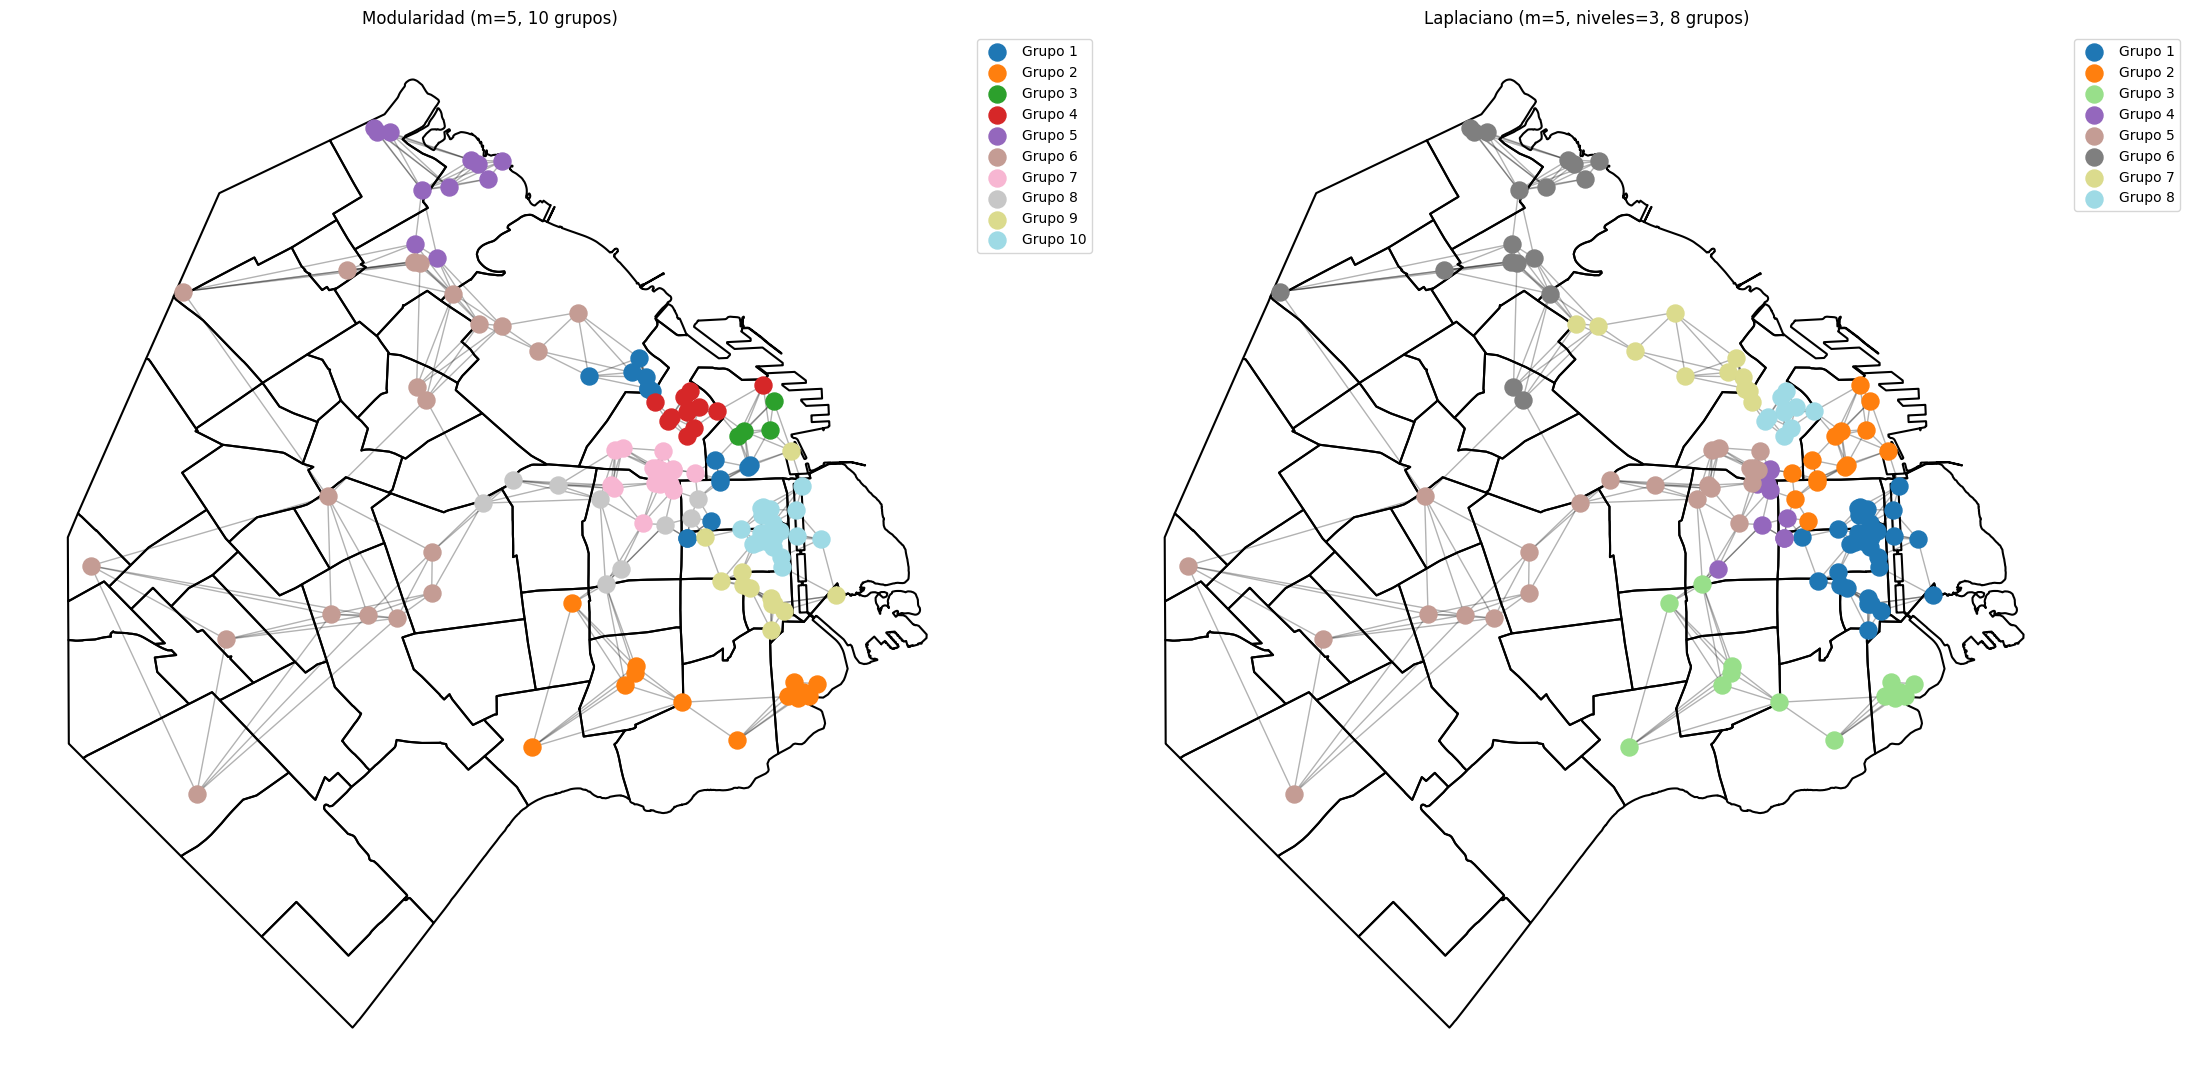

In [21]:
funciones_TP2.correr_metodos(D, 5, G_layout,barrios)


Para el caso m = 5, notamos que en la zona sur ambos métodos coinciden bastante: los museos son agrupados en una única comunidad bien definida, sin mayores diferencias entre modularidad y laplaciano. Algo similar sucede en el oeste, donde los dos métodos también generan una sola comunidad. Sin embargo, la modularidad incluye en ese mismo grupo museos ubicados mucho más al norte, lo cual resulta difícil de justificar desde el punto de vista geográfico. En cambio, el laplaciano agrupa los museos del oeste con otros más cercanos al centro, lo que refuerza la idea de que este método tiende a preservar la cercanía territorial entre nodos.

En el centro de la ciudad, la situación se invierte. Modularidad divide más el área en varias comunidades, aunque vuelve a aparecer el problema de museos que quedan "atravesados" por otras comunidades, lo que debilita un poco la coherencia espacial del resultado. El laplaciano, por su parte, muestra una segmentación más contenida en esta zona. De todas formas, vale aclarar que en esta comparación el laplaciano produjo menos grupos (8 contra 10), lo que también explica en parte esta menor fragmentación.

Nos parece interesante hacer hincapié en la estabilidad del laplaciano de este caso, porque es el unico que tiene cierta variacion, desarrollamos de forma mas extensa en la seccion ¨Analisis de estabilidad laplaciano¨.

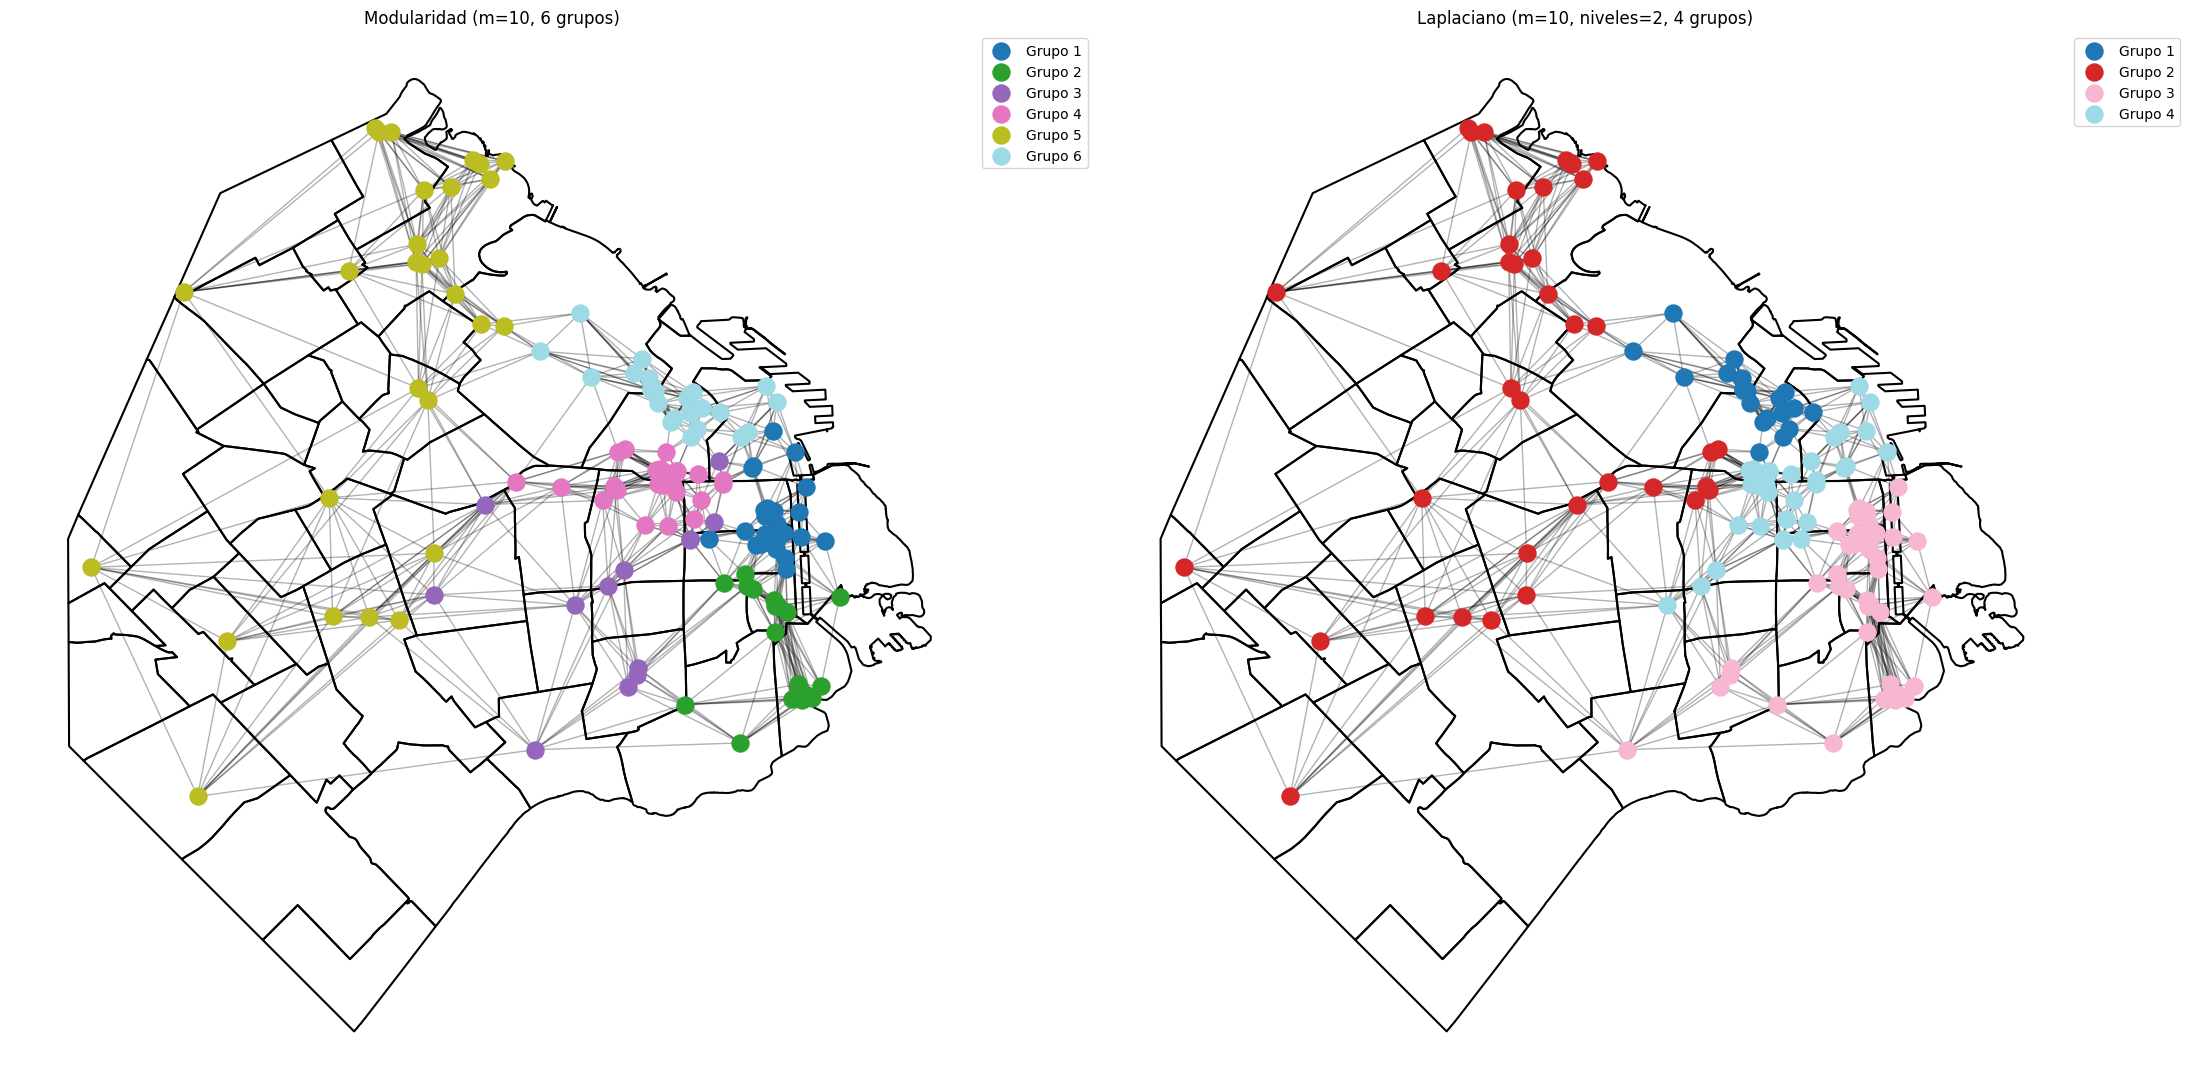

In [22]:
funciones_TP2.correr_metodos(D, 10, G_layout,barrios)


Es importante recordar que la cantidad de grupos generados por el método del laplaciano está condicionada por los resultados de modularidad. A medida que aumentamos el valor de m, cada museo se conecta con más vecinos y la red se vuelve más densa. Esto favorece que la modularidad reduzca la cantidad de comunidades, ya que tiende a agrupar nodos fuertemente conectados incluso si están más dispersos. Como consecuencia, el laplaciano también parte de una estructura menos segmentada, y ambos métodos comienzan a ofrecer particiones más similares. Aun así, el laplaciano tiende a formar comunidades más compactas en términos de estructura de red, con límites más definidos entre grupos.

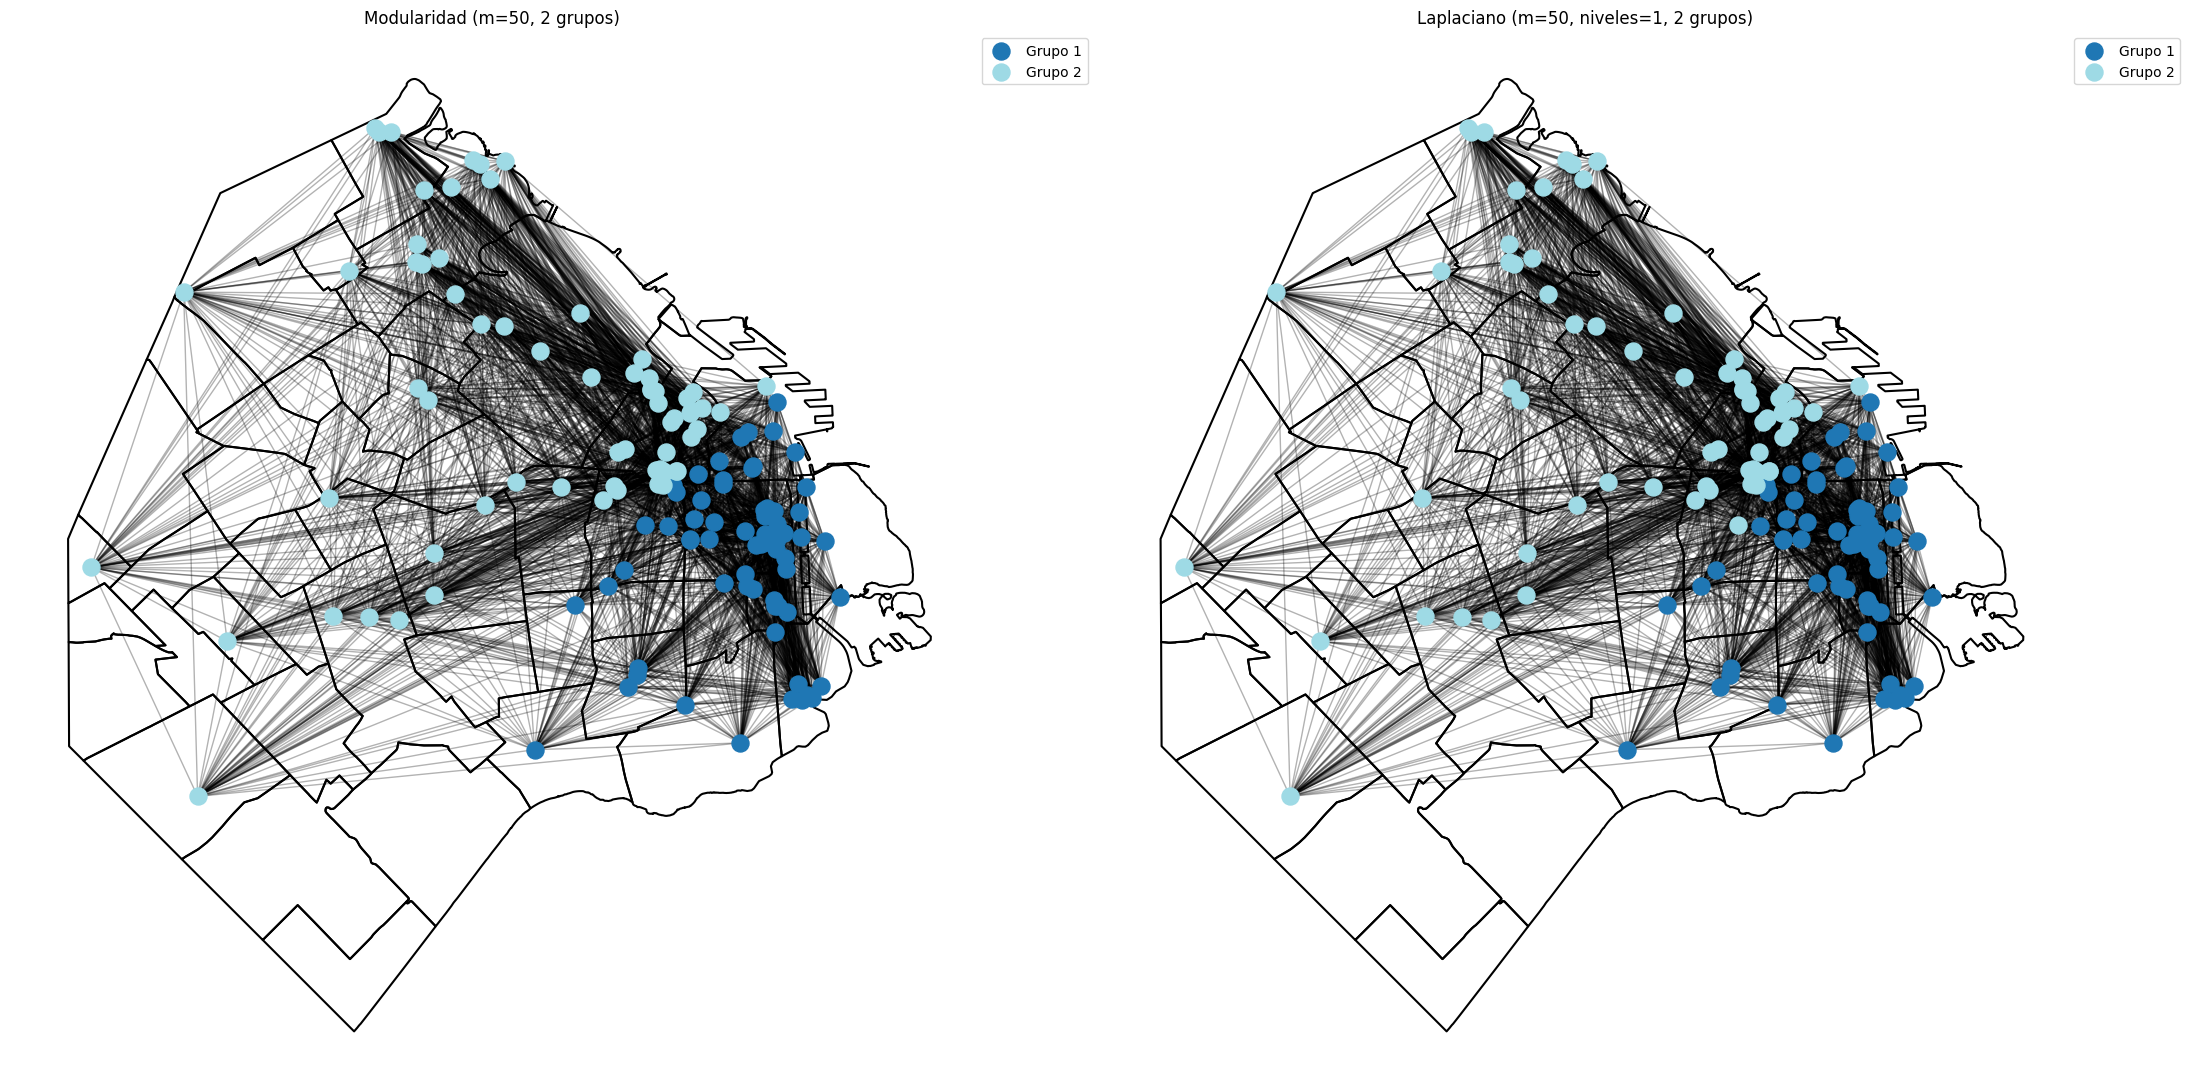

In [23]:
funciones_TP2.correr_metodos(D, 50, G_layout,barrios)


En este último caso, con un valor de m = 50, la partición de comunidades pierde casi cualquier criterio identificable. Ambos métodos coinciden en una división binaria del grafo que ya no parece responder ni a patrones espaciales ni a estructuras locales claras. Tanto la modularidad como el laplaciano arrojan resultados prácticamente equivalentes, evidenciando que, al aumentar el umbral de conexiones, la red se vuelve más uniforme y menos propensa a una segmentación significativa. Algo similar a lo que ocurria con el PageRank al tener un alfa cercano a uno, se genera una aleatoriedad que puede interferir en un modelado realista.


# Analisis de estabilidad modularidad

Para analizar la estabilidad del método de partición por modularidad, vamos a realizar 30 ejecuciones utilizando diferentes valores de seed. En todas las corridas, mantenemos constante la cantidad de vecinos por museo y medimos cómo varía la cantidad de grupos detectados. Esta será nuestra métrica de estabilidad para este método.

La idea detrás de este enfoque es que, si la modularidad converge consistentemente al mismo número de comunidades (aunque el orden o los elementos dentro de cada grupo puedan variar levemente), entonces podemos considerar que el método es estable frente a variaciones en la inicialización del algoritmo.

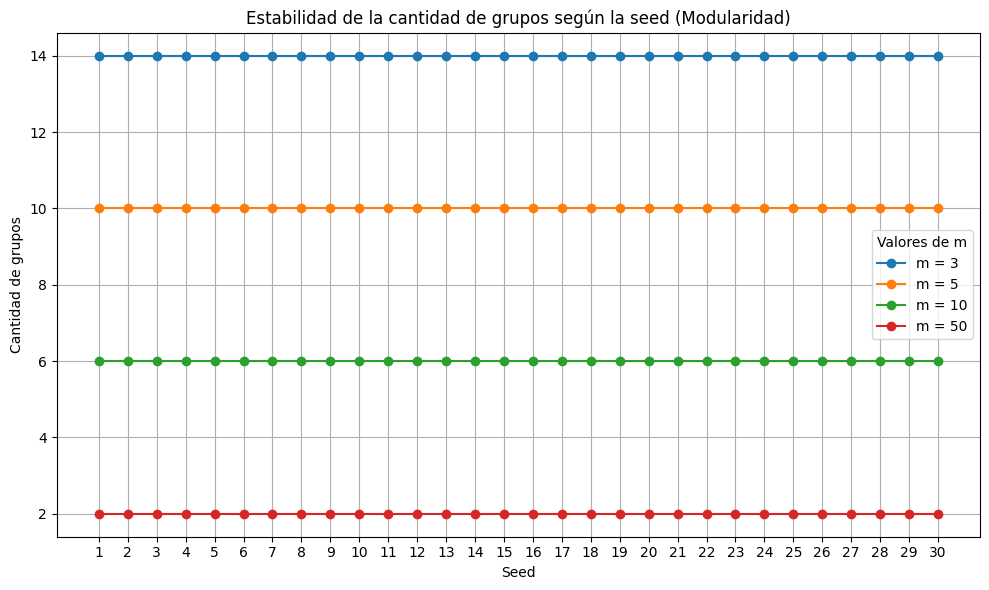

In [24]:
# Parámetros
valores_m = [3, 5, 10, 50]
lista_seeds = list(range(1, 31))

# Análisis de estabilidad
funciones_TP2.analizar_estabilidad_modularidad(D, valores_m, lista_seeds)

Tal como se esperaba, el método de partición por modularidad mostró una gran estabilidad frente a los cambios en la inicialización del algoritmo. Para cada valor de m, la cantidad de comunidades detectadas se mantuvo exactamente igual a lo largo de las 30 ejecuciones. Esto indica que, aunque puede haber pequeñas variaciones en cómo se agrupan algunos nodos, el número total de grupos que encuentra el método es siempre el mismo. En definitiva, la cantidad de comunidades parece ser una metrica sólida y confiable, incluso cuando se modifica el punto de partida.

# Analisis de estabilidad Laplaciano

Para analizar la estabilidad del método del Laplaciano, vamos a realizar otras 30 ejecuciones. En cada una, se particiona la red en una cantidad fija de comunidades, determinada por el número de niveles.

Dado que la cantidad de comunidades es constante, la métrica elegida para estudiar la estabilidad será la cantidad de museos por comunidad para cada uno de los valores de $m$. De esta forma, si las distribuciones varían significativamente entre ejecuciones con distintas seeds, se considerará que el método es inestable frente a cambios en la inicialización.

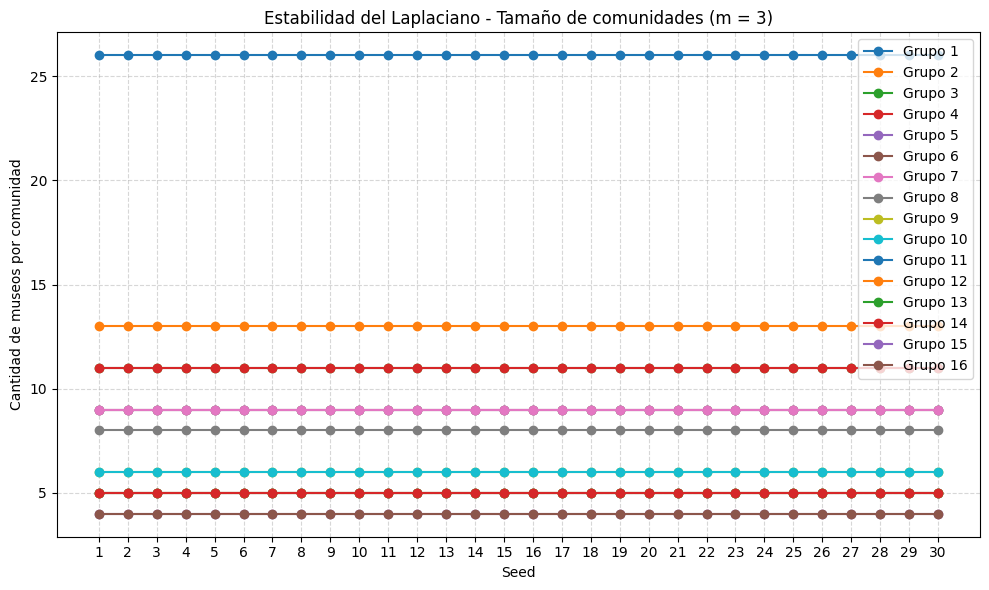

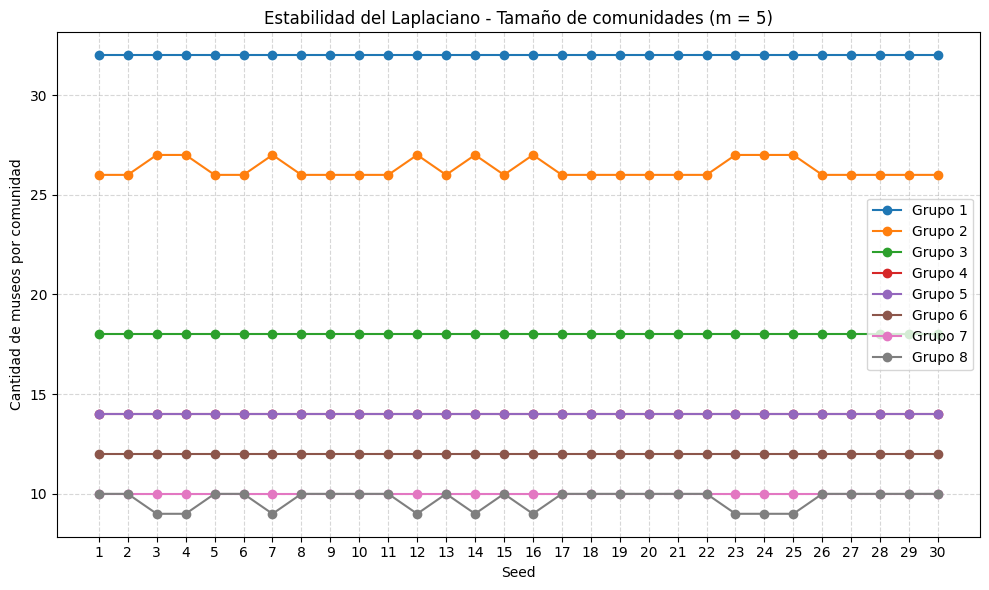

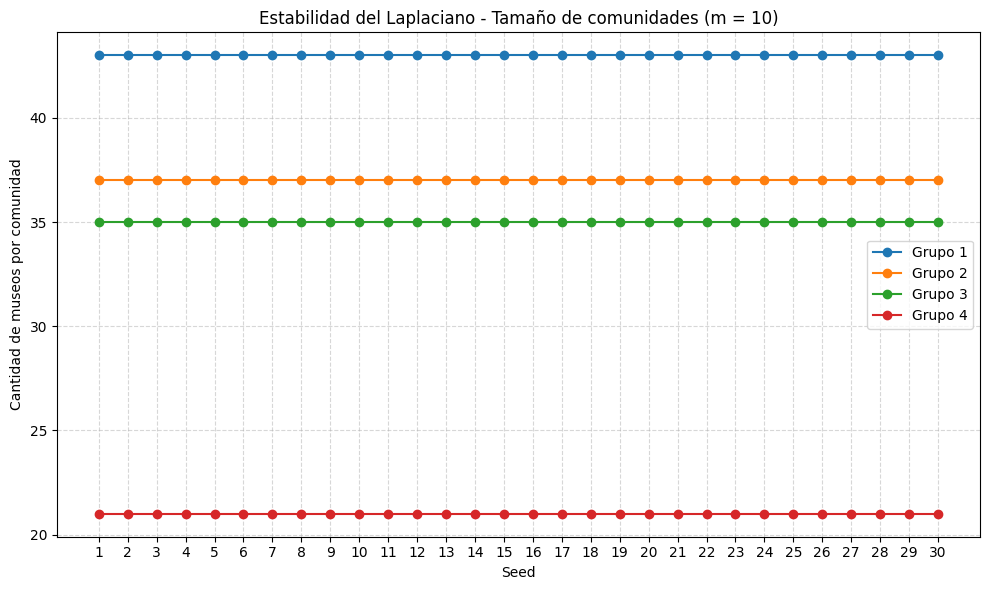

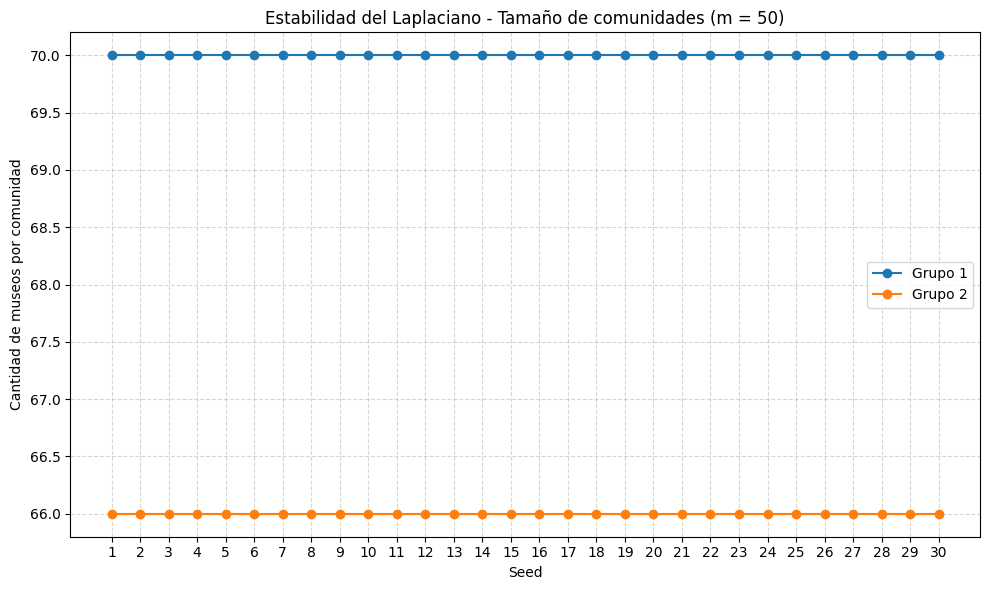

In [25]:
# Parámetros
valores_m = [3, 5, 10, 50]
niveles = [4, 3, 2, 1]
seeds = list(range(1, 31))  # 30 ejecuciones

# Análisis de estabilidad
funciones_TP2.analizar_estabilidad_laplaciano(D, valores_m, seeds, niveles)


Al analizar la estabilidad del método del laplaciano, observamos que el comportamiento general es muy consistente: en casi todas las ejecuciones, la cantidad y distribución de comunidades se mantiene estable frente a variaciones en la seed. La única excepción se da en el caso con m = 5, donde un museo cambia de grupo entre dos comunidades que están bastante próximas. Esta leve variación puede explicarse por lo ajustado del caso: al estar cerca del límite entre ambos grupos, pequeñas diferencias en la inicialización del algoritmo pueden modificar su asignación final.

# **Punto 5**

A lo largo de este trabajo nos propusimos analizar la estructura interna de la red de museos de la Ciudad de Buenos Aires usando herramientas de álgebra lineal y la teoría espectral de grafos. Este enfoque nos permitió detectar tanto los nodos más centrales, en el TP1, como los agrupamientos internos más relevantes, en el TP2, y analizar la estabilidad y coherencia espacial de los resultados obtenidos.

En particular, el uso de autovalores y autovectores fue importante para identificar particiones naturales de la red. Estos vectores nos permitieron descomponer la información del grafo en distintas direcciones: por un lado, en el caso del método del Laplaciano, nos enfocamos en el segundo autovalor más chico, asociado a una partición de corte mínimo. Este autovalor surge al aplicar el método de la potencia inversa, basada en el “shifting” espectral y que permite encontrar las direcciones dominantes en una matriz simétrica como L. Como ya se mencionó antes, la elección del autovector asociado al segundo autovalor se debe al hecho de que el autovalor 0, asociado al vector de unos, representa la agrupación trivial de toda la red.

En contraste, el método de la modularidad se basa en encontrar el mayor autovalor de la matriz R, asociado a la partición que maximiza la cohesión interna de los grupos en comparación a lo esperado por azar. Esta maximización se hace también a partir de álgebra lineal, aplicando el método de la potencia para aproximar el autovalor dominante y su dirección asociada. Ambos métodos tienen en cuenta propiedades de las matrices simétricas, como la ortogonalidad de autovectores, la diagonalización espectral, y la estructura de sus autovalores.

Los resultados obtenidos nos permiten hacer ciertas observaciones. Primero, la cantidad de comunidades detectadas disminuye al aumentar m, reflejando cómo la red se vuelve más densa y difícil de segmentar. Asimismo, observamos que la modularidad es más estable frente a variaciones en la inicialización del algoritmo, mientras que el Laplaciano puede variar levemente cuando hay multiplicidad en los autovalores. Sin embargo, este último genera particiones más territorialmente coherentes, al mantener agrupaciones compactas.

Desde una perspectiva más general, en este trabajo mostramos cómo el álgebra lineal puede ser aplicada para analizar problemas concretos y complejos, como el estudio de redes urbanas reales. La relación vista entre la estructura del grafo y el espectro de sus matrices asociadas nos permitió extraer información que no es evidente a simple vista, mostrando patrones de conectividad y cohesión que podrían resultar útiles para interpretar fenómenos sociales, culturales y geográficos.
